In [1]:
### This is a gene specific analysis notebook
from candidate_utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [10]:
# Gene-transcript dict
dict_name = pickle.load(open(os.path.join(dir_refs,'dict_name_forcov_062121.pkl'), 'rb'))

In [8]:
gene_name = 'ACVRL1'

In [11]:
# Find transcript for the gene
for transcript,gene in dict_name.items():
    if gene == gene_name:
        print(transcript)

ENST00000388922


<span style="color:blue">**The histology subtypes of patients with the mutation**</span>.


In [6]:
df_str, df_num = get_num_str(gene_name)

/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (17,24) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
df_str

,dcc_specimen_type,histology_tier3,histology_tier4,tumour_histological_type,tumour_stage,tumour_histological_comment,specimen_donor_treatment_type
syn,{'Primary tumour - solid tissue': 3},{'Adenocarcinoma': 3},{'Adenocarcinoma': 3},"{'Adenocarcinoma, NOS': 3}","{'T2cN0': 1, 'T3aN0': 1, 'T3aN0M0': 1}",{nan: 3},{'no treatment': 3}
all,"{'Primary tumour - solid tissue': 194, 'Metast...",{'Adenocarcinoma': 199},{'Adenocarcinoma': 199},"{'Adenocarcinoma, NOS': 180, 'Acinar cell carc...","{'T2cN0': 22, 'T1c': 12, 'T2a': 17, nan: 29, '...",{nan: 199},"{'no treatment': 168, nan: 19, 'other therapy'..."


In [8]:
df_num

SV.events  Coding.SNVs  Non.coding.SNVs  \
mut_status                                                   
syn        count    3.000000     3.000000         3.000000   
           mean    23.333333    41.333333      3874.000000   
           std     10.503968    28.571548      2356.565085   
           min     13.000000    14.000000      1392.000000   
           25%     18.000000    26.500000      2770.500000   
           50%     23.000000    39.000000      4149.000000   
           75%     28.500000    55.000000      5115.000000   
           max     34.000000    71.000000      6081.000000   
all        count  198.000000   199.000000       199.000000   
           mean    93.904040    29.989950      3174.261307   
           std    101.265224    22.316817      2252.340725   
           min      0.000000     0.000000        44.000000   
           25%     29.250000    17.500000      1834.500000   
           50%     67.000000    27.000000      2886.000000   
           75%    121.000000    37.000000      3737.000000   
           max    777.000000   185.000000     16980.000000   

                  CNA.events..do_not_use.  Retrotransposon.insertions  \
mut_status                                                              
syn        count                 3.000000                    3.000000   
           mean                153.666667                    0.666667   
           std                  45.796652                    1.154701   
           min                 117.000000                    0.000000   
           25%                 128.000000                    0.000000   
           50%                 139.000000                    0.000000   
           75%                 172.000000                    1.000000   
           max                 205.000000                    2.000000   
all        count               199.000000                  197.000000   
           mean                382.783920                    4.680203   
           std                 299.114212                   11.294493   
           min                  73.000000                    0.000000   
           25%                 169.500000                    0.000000   
           50%                 275.000000                    2.000000   
           75%                 487.500000                    4.000000   
           max                1617.000000                   98.000000   

                  Mitochondrial.mutations   all.Indels  
mut_status                                              
syn        count                 3.000000     3.000000  
           mean                  5.666667   220.666667  
           std                   4.725816   123.791491  
           min                   2.000000    80.000000  
           25%                   3.000000   174.500000  
           50%                   4.000000   269.000000  
           75%                   7.500000   291.000000  
           max                  11.000000   313.000000  
all        count               184.000000   199.000000  
           mean                  4.000000   294.115578  
           std                   2.929033   307.690340  
           min                   0.000000     1.000000  
           25%                   2.000000   116.500000  
           50%                   3.000000   244.000000  
           75%                   5.000000   347.000000  
           max                  19.000000  3012.000000

<span style="color:blue">**Mutation**</span>.


In [12]:
df_all, df_mut, donor_list = get_mut(gene_name)

/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (17,24) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Total 199 patients
3 patients have synonymous mutations, they are: ['DO52501', 'DO10809', 'DO50416']
12:g.52307539C>T
12:g.52307549T>C
12:g.52314611G>A


In [10]:
df_all.loc[pd.IndexSlice[gene_name, :,donor_list],'Genome_Change']

Hugo_Symbol  Variant_Classification  Donor_ID
ACVRL1       Silent                  DO52501     g.chr12:52307539C>T
                                     DO10809     g.chr12:52307549T>C
                                     DO50416     g.chr12:52314611G>A
Name: Genome_Change, dtype: object

<span style="color:blue">**CNV**</span>.


In [14]:
cnv = get_cnv(donor_list, gene_name)

                               54319e3d-c28f-4ba1-9c87-299d303e4de3
Gene Symbol Locus ID Cytoband                                      
ACVRL1      94       12q13.13                                   2.0
                               ad007b59-46f6-48b9-958a-2b9d28cca3b7
Gene Symbol Locus ID Cytoband                                      
ACVRL1      94       12q13.13                                   2.0
                               f9c1df10-25b8-c8ae-e040-11ac0d486375
Gene Symbol Locus ID Cytoband                                      
ACVRL1      94       12q13.13                                   2.0


<span style="color:blue">**Expression PCAWG**</span>.


/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (17,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Number of normal patient: 1
Number of synonymous patients: 0
Number of other tumor patients:19
test statistic:0.0,p-value:0.0


/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/scipy/stats/stats.py:7039: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


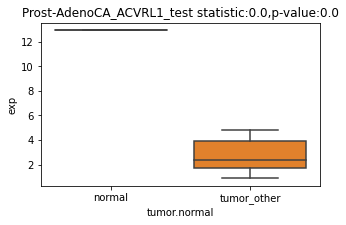

In [15]:
get_expression(gene_name)

<span style="color:blue">**CRISPR**</span>.


In [17]:
get_lineage(gene_name, 'Prostate')

['Prostate Adenocarcinoma' 'Prostate Hyperplasia']


5 in histology subtype
984 not in histology subtype
test statistic:1655.0,    p-value:0.1033
test statistic:2276.0,    p-value:0.3864


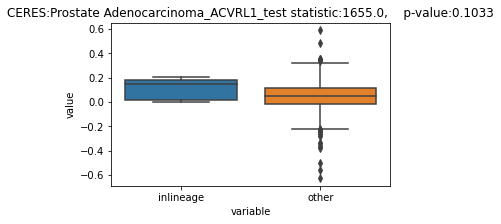

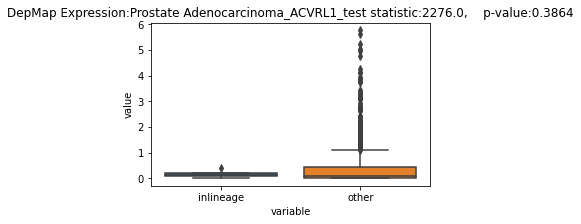

In [18]:
get_CERES(gene_name, 'Prostate Adenocarcinoma')

<span style="color:blue">**Alternative Splicing**</span>  

In [5]:
dir_splice = '../../anno_ref/ICGC/alternative_splicing'
exp_dir = '../../anno_ref/ICGC/pcawg_rnaseq/'
# Read aliquot id information
df_exp_info = pd.read_csv(os.path.join(exp_dir,'rnaseq.metadata.tsv'), sep = '\t')

In [13]:
### If patient is in the splicing file(transcriptome analysis info)
for donor in donor_list:
    tumor_id = df_exp_info[df_exp_info['icgc_donor_id'] == donor]['aliquot_id']
    if len(tumor_id) ==0:
        print(f'{donor} is not in PCAWG transcriptome analysis')

DO52501 is not in PCAWG transcriptome analysis
DO10809 is not in PCAWG transcriptome analysis
DO50416 is not in PCAWG transcriptome analysis
